In [36]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Loading the data
data= pd.read_excel('news_share_data.xlsx')
print(data.shape)
data.head()

(1003, 22)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [38]:
df = data.copy()

In [39]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if appropriate)
data.dropna(inplace=True)

# Impute missing values (if needed)
# For numerical columns: Use mean, median, or other strategies to fill missing values
data['num_hrefs'].fillna(data['num_hrefs'].median(), inplace=True)
# For categorical columns: Use mode or other strategies
data['data_channel'].fillna(data['data_channel'].mode()[0], inplace=True)


article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64


In [40]:
# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=['data_channel'])

# Label encoding (if necessary)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['data_channel_encoded'] = label_encoder.fit_transform(data['data_channel'])


In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scaling (to a specific range)
scaler = MinMaxScaler(feature_range=(0, 1))
data[['num_hrefs', 'num_imgs']] = scaler.fit_transform(data[['num_hrefs', 'num_imgs']])

# Standardization (scaling to mean=0 and variance=1)
scaler = StandardScaler()
data['average_token_length'] = scaler.fit_transform(data[['average_token_length']])


In [44]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop('shares', axis=1)
y = data['shares']

# Split the dataset into training and testing setsa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


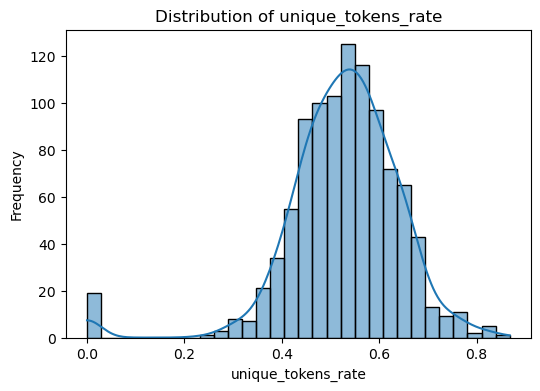

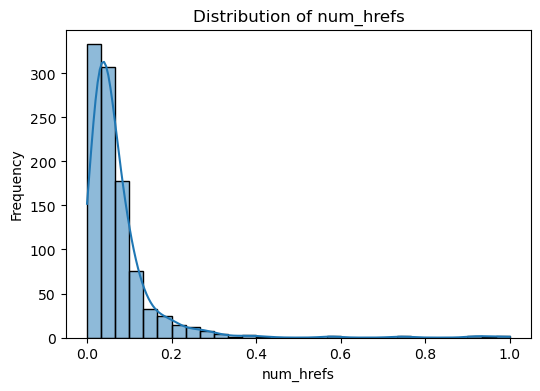

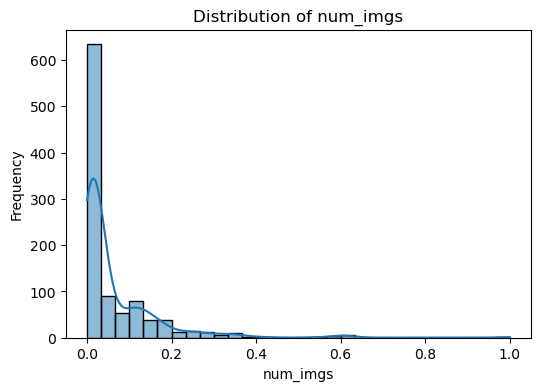

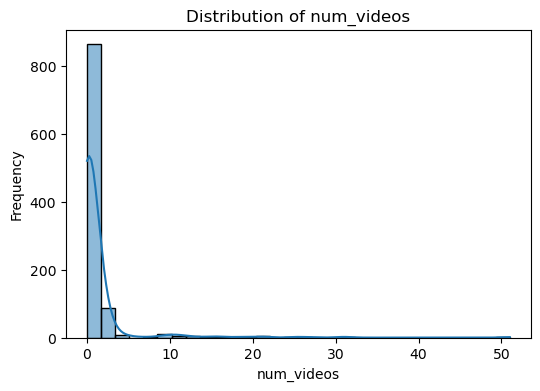

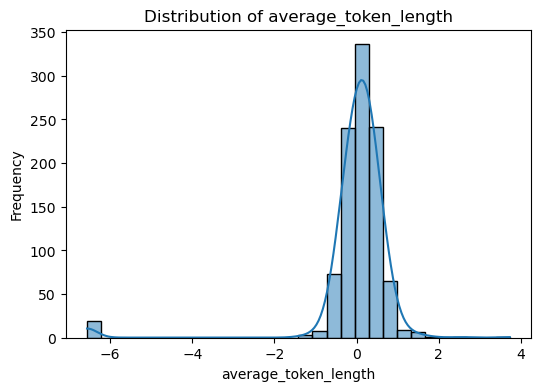

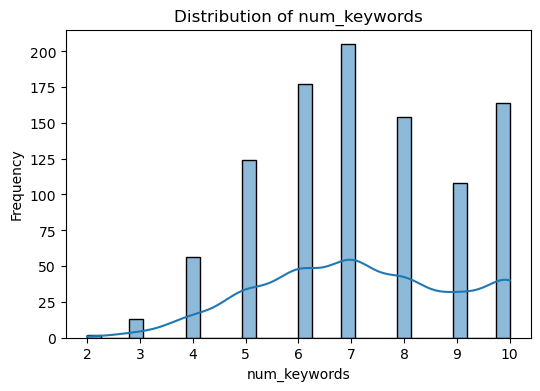

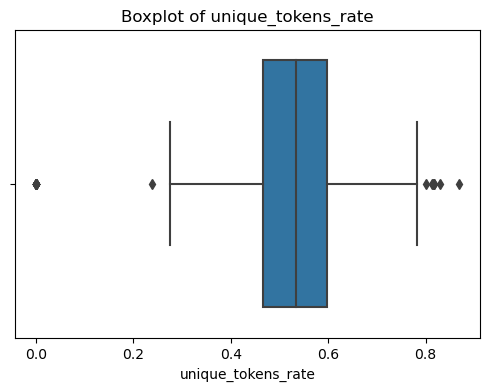

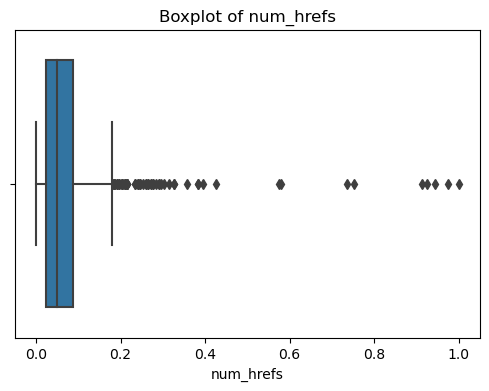

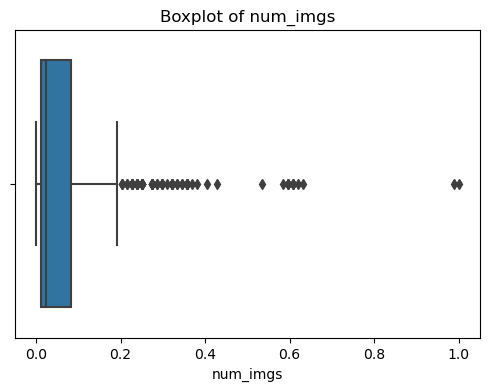

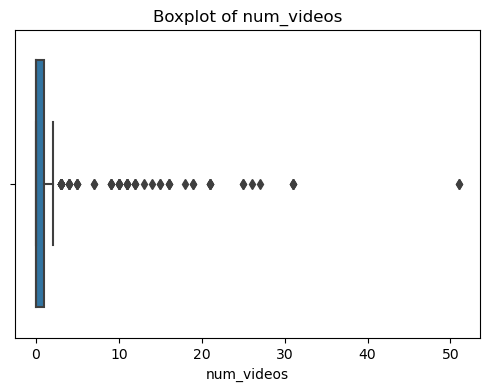

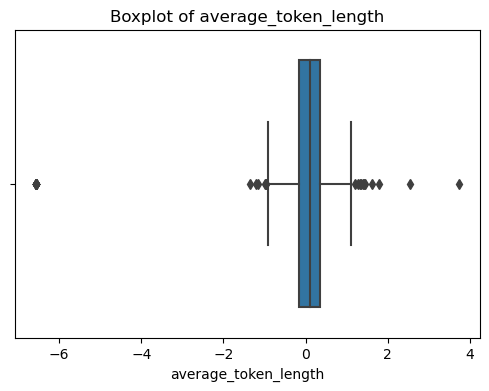

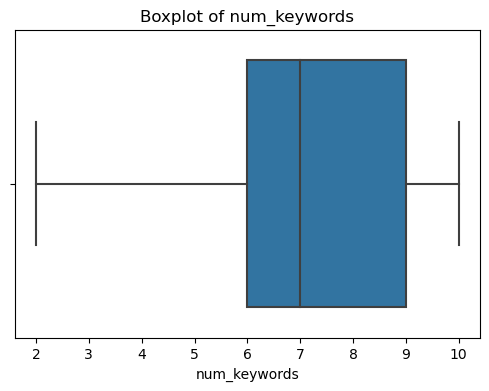

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric variables for univariate analysis
numeric_columns = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords']

# Histograms for numeric variables
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for numeric variables
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


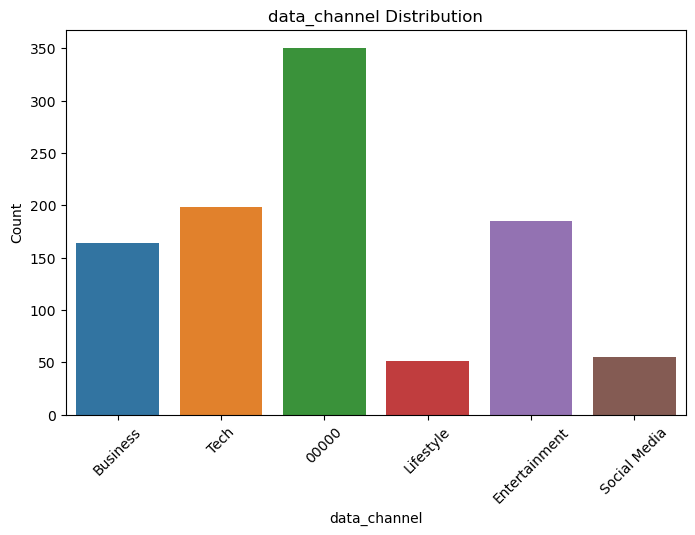

In [12]:
# Categorical variables for univariate analysis
categorical_columns = ['data_channel']

# Countplots for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=data)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


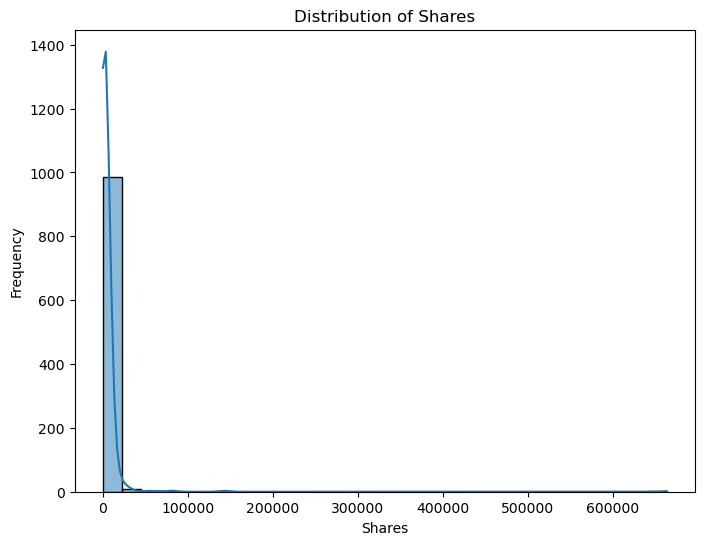

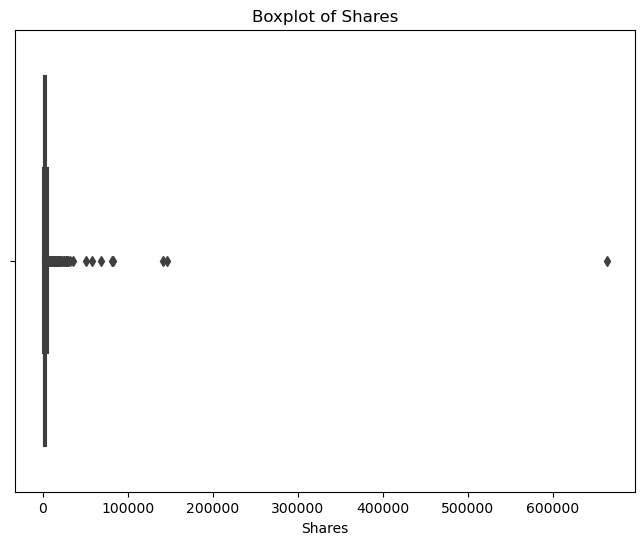

In [13]:
# Distribution of the target variable 'shares'
plt.figure(figsize=(8, 6))
sns.histplot(data['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

# Boxplot of the target variable 'shares'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['shares'])
plt.title('Boxplot of Shares')
plt.xlabel('Shares')
plt.show()


In [15]:
features = df.columns.tolist()[18:]
print("Total Number of Features: "+str(len(features)))

Total Number of Features: 4


In [16]:
df1 = df[features]
print(df1.shape)
df1.head(3)

(1003, 4)


,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,0.024490,0.25,0.25,1600
1,0.003745,0.00,0.00,1500
2,0.019608,0.00,0.00,1400


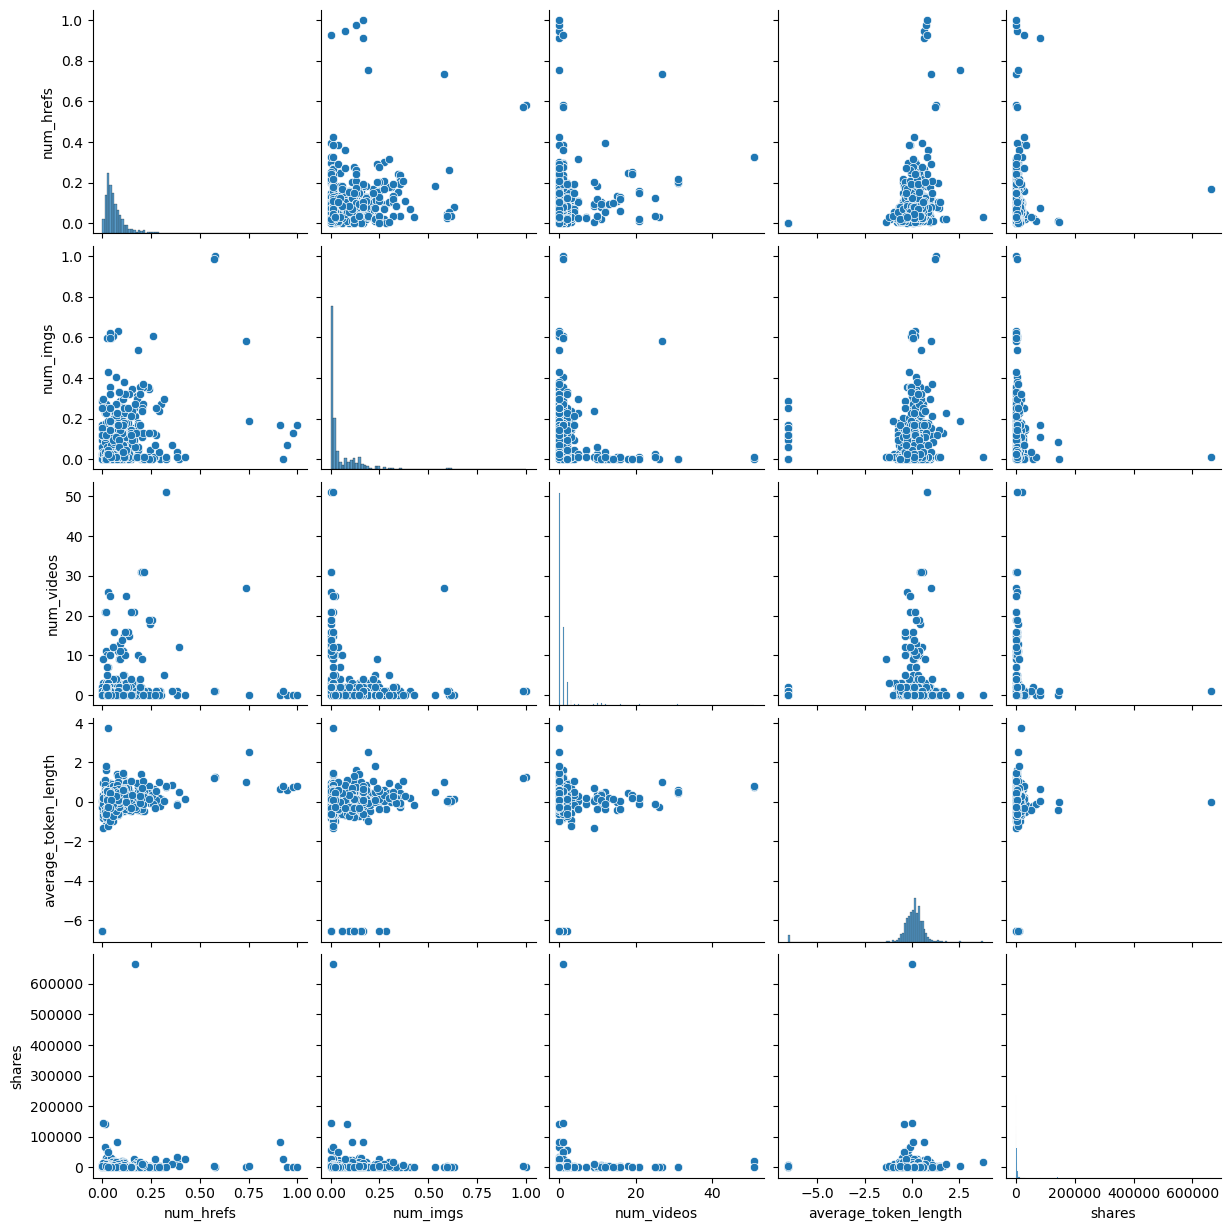

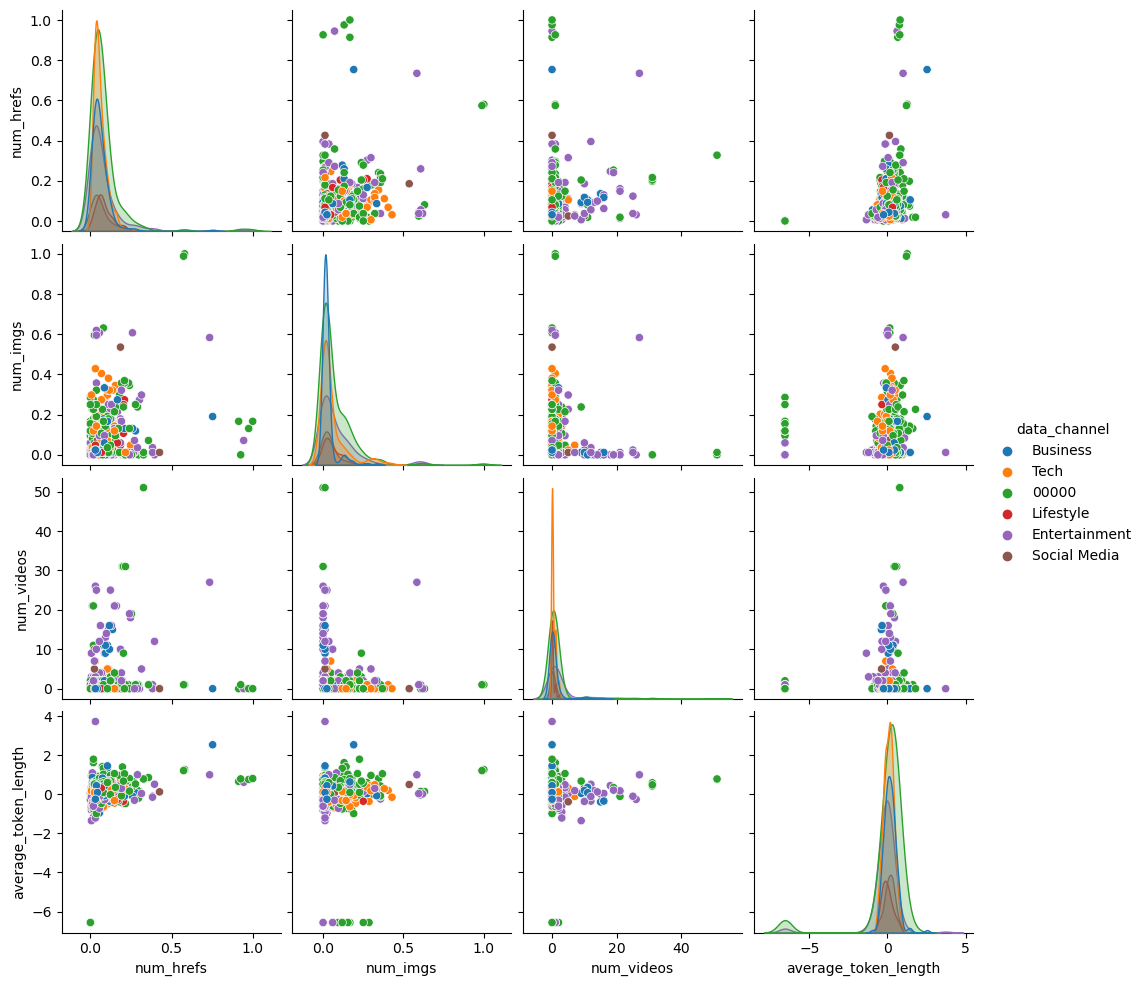

In [17]:
import seaborn as sns

# Pairwise scatter plots for selected numeric variables against the target variable 'shares'
sns.pairplot(data=data, vars=['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'shares'])
plt.show()

# Pairplot with hue based on categorical variable 'data_channel'
sns.pairplot(data=data, vars=['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length'], hue='data_channel')
plt.show()


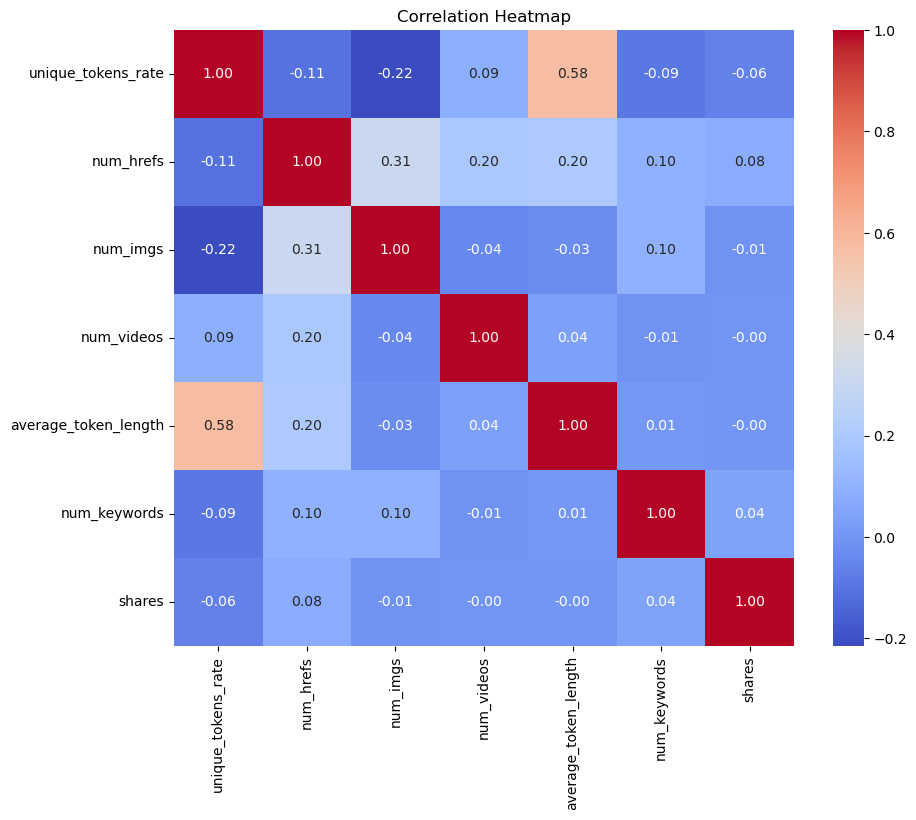

In [18]:
# Correlation heatmap for numeric variables including the target variable 'shares'
numeric_columns = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'shares']
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


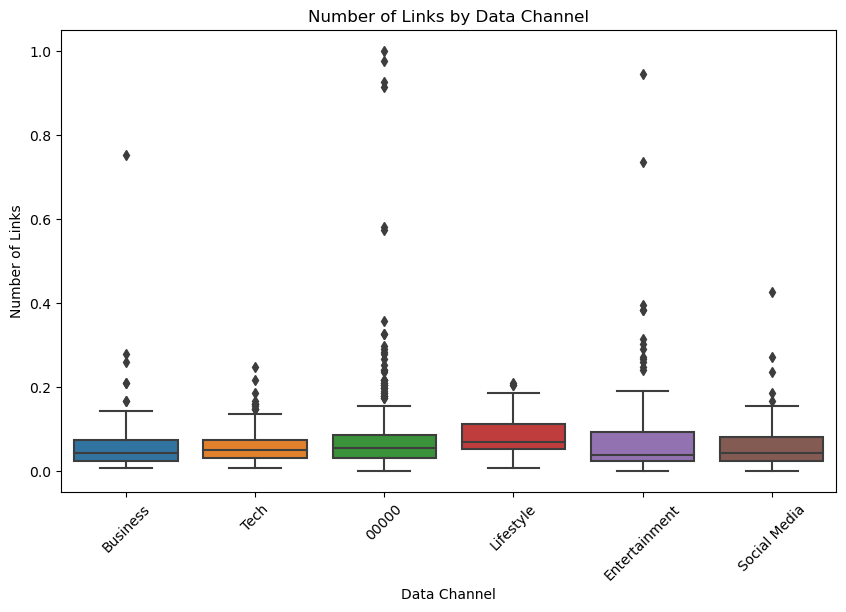

In [19]:
# Boxplots for numerical variables against a categorical variable (e.g., 'data_channel')
plt.figure(figsize=(10, 6))
sns.boxplot(x='data_channel', y='num_hrefs', data=data)
plt.title('Number of Links by Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Number of Links')
plt.xticks(rotation=45)
plt.show()


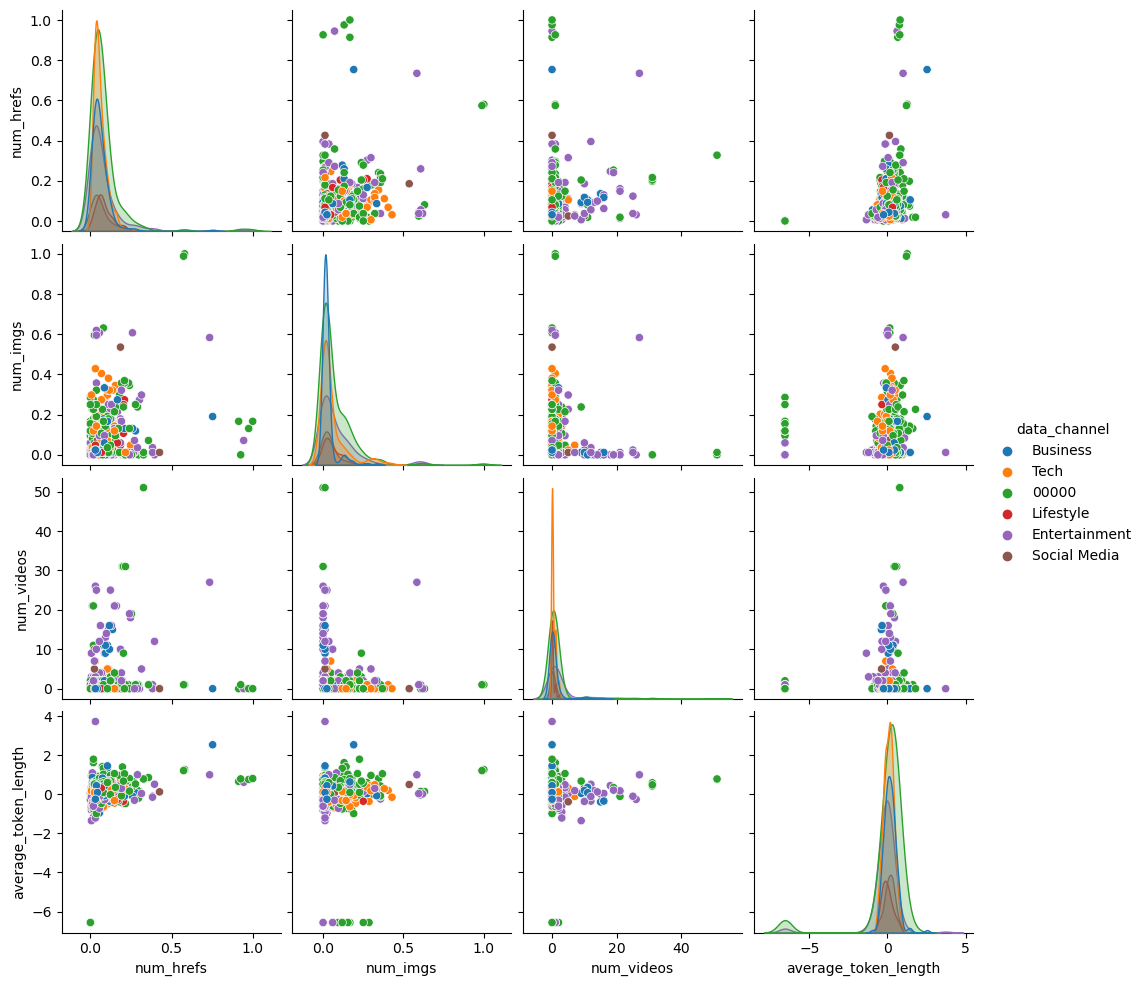

In [20]:
# Scatter plot matrix for selected numeric variables
sns.pairplot(data=data, vars=['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length'], hue='data_channel')
plt.show()


In [28]:
df1.head()


,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,0.024490,0.25,0.25,1600
1,0.003745,0.00,0.00,1500
2,0.019608,0.00,0.00,1400
3,0.011952,0.00,0.00,1300
4,0.034946,0.00,0.00,3000


In [29]:
df1.isna().sum()


global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64

In [30]:
df_final = df1.dropna()
df_final.isna().sum()

global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64

In [31]:
df_final.to_csv('selected.csv',index=False)

In [32]:
# Display data types of columns
print(data.dtypes)


article_id                             int64
title                                 object
text                                  object
published_date                datetime64[ns]
unique_tokens_rate                   float64
num_hrefs                            float64
num_imgs                             float64
num_videos                             int64
average_token_length                 float64
num_keywords                           int64
data_channel                          object
min_avg_key                          float64
max_avg_key                          float64
avg_avg_key                          float64
href_avg_shares                      float64
global_subjectivity                  float64
global_sentiment_polarity            float64
global_rate_positive_words           float64
global_rate_negative_words           float64
title_subjectivity                   float64
title_sentiment_polarity             float64
shares                                 int64
data_chann

In [33]:
# Get numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numerical columns using mean
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [34]:
# Get categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Impute missing values in categorical columns using mode
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])


In [35]:
# Save the modified data to a new CSV file
data.to_csv('imputed_data.csv', index=False)
